<a href="https://colab.research.google.com/github/Victor-Mutuku/Linear-Regression-Model/blob/main/Victor_Mutuku_CS_DA02_25021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name:Victor Mutuku
#ID:CS-DA02-25021
#Title:Regression Models
#Date:01 Nov 2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving areas.csv to areas.csv
Saving homeprices.csv to homeprices.csv
Saving homeprices-m.csv to homeprices-m.csv


In [ ]:
#Load the Data
areas_df = pd.read_csv('areas.csv')
homeprices_df = pd.read_csv('homeprices.csv')
homepricesm_df = pd.read_csv('homeprices-m.csv')
#Display the head of each dataframe
display(areas_df.head())
display(homeprices_df.head())
display(homepricesm_df.head())

,area
0,1000
1,1500
2,2300
3,3540
4,4120


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


,area,bedrooms,age,price
0,2600,3.00,20,550000
1,3000,4.00,15,565000
2,3200,NaN,18,610000
3,3600,3.00,30,595000
4,4000,5.00,8,760000


In [ ]:
#Inspect the Datasets Structure
#(a)Info of all and description of (homeprices_df)
display(areas_df.info())
display(homeprices_df.info())
display(homepricesm_df.info())
homeprices_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    13 non-null     int64
dtypes: int64(1)
memory usage: 236.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  6 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


None

,area,price
count,5.00,5.00
mean,"3,280.00","626,000.00"
std,540.37,"74,949.98"
min,"2,600.00","550,000.00"
25%,"3,000.00","565,000.00"
50%,"3,200.00","610,000.00"
75%,"3,600.00","680,000.00"
max,"4,000.00","725,000.00"


In [ ]:
#(b)Checking missing values
areas_df.isnull().sum()

,0
area,0


In [ ]:
homeprices_df.isnull().sum()

,0
area,0
price,0


In [ ]:
homepricesm_df.isnull().sum()

,0
area,0
bedrooms,1
age,0
price,0


In [ ]:
#Handling Missing Values
homepricesm_df['bedrooms'].fillna(homepricesm_df['bedrooms'].median(),inplace=True)
homepricesm_df.isnull().sum()

/tmp/ipython-input-3152925729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  homepricesm_df['bedrooms'].fillna(homepricesm_df['bedrooms'].median(),inplace=True)


,0
area,0
bedrooms,0
age,0
price,0


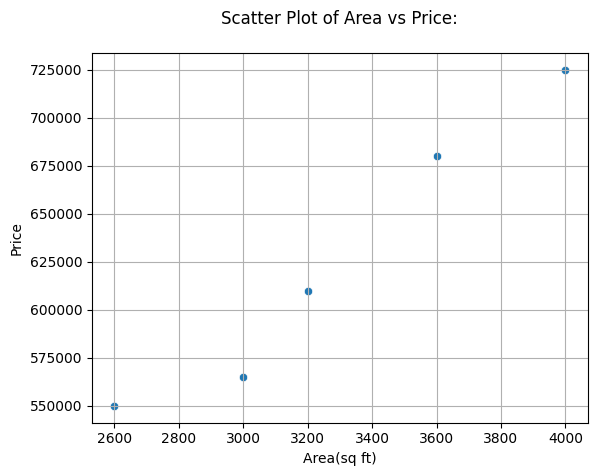

In [ ]:
#Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='area',y='price',data=homeprices_df)
plt.title('Scatter Plot of Area vs Price:\n')
plt.grid(True)
plt.xlabel('Area(sq ft)')
plt.ylabel('Price')
plt.show()

In [ ]:
#Prepare the Data and Target(Useful for y test)
x=homeprices_df[['area']]
y=homeprices_df['price']

In [ ]:
#Spliting into Training and Test sets (y test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
#Building and Training the Model
from sklearn.linear_model import LinearRegression
model=LinearRegression() #build
model.fit(x_train,y_train) #train(fit)

LinearRegression()

In [ ]:
#Model Testing
y_pred=model.predict(x_test)
print(y_pred)

[596315.78947368 723947.36842105]


In [ ]:
#Checking which areas were tested
print('x_test:\n',x_test)
print('y_test:\n',y_test)
print('y_pred:\n',y_pred)


x_test:
    area
1  3000
4  4000
y_test:
 1    565000
4    725000
Name: price, dtype: int64
y_pred:
 [596315.78947368 723947.36842105]


In [ ]:
#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)


MAE: 16184.210526315845
MSE: 490893351.800556
RMSE: 22156.113192537992
R2: 0.9232979137811631


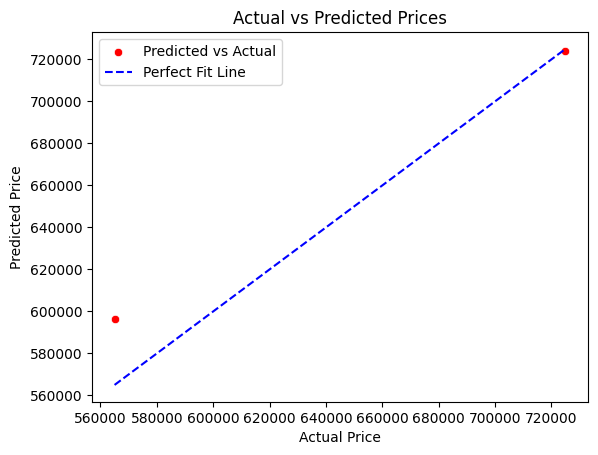

In [ ]:
#Plotting the Regression line against the Actual data
sns.scatterplot(x=y_test,y=y_pred,color='red',label='Predicted vs Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'b--',label='Perfect Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
#Predicting price for the Area Dataset since its 1D
areas_df['predicted_price']= model.predict(areas_df[['area']]) # Predicting using the entire (areas_df)
print(areas_df)

    area  predicted_price
0   1000       341,052.63
1   1500       404,868.42
2   2300       506,973.68
3   3540       665,236.84
4   4120       739,263.16
5   4560       795,421.05
6   5490       914,118.42
7   3460       655,026.32
8   4750       819,671.05
9   2300       506,973.68
10  9000     1,362,105.26
11  8600     1,311,052.63
12  7100     1,119,605.26


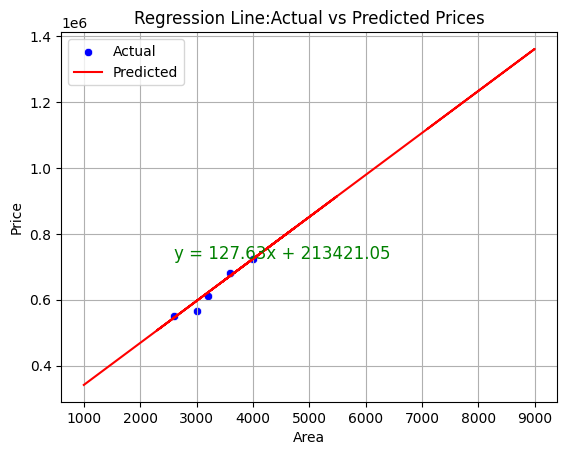

In [ ]:
#Plotting the Regresion line of the predicted prices:That is(Actual price vs Areas_df prices[predicted])
sns.scatterplot(x=homeprices_df['area'],y=homeprices_df['price'],color='blue',label='Actual')
plt.plot(areas_df['area'],areas_df['predicted_price'],color='red',label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line:Actual vs Predicted Prices')
m = model.coef_[0]
b = model.intercept_
equation = f'y = {m:.2f}x + {b:.2f}'
plt.text(homeprices_df['area'].min(),homeprices_df['price'].max(), equation, fontsize=12, color='green')
plt.grid(True)
plt.legend()
plt.show()